In [1]:
from datascience import *
import numpy as np
%matplotlib inline

In [5]:
trips = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/trip.csv')
stations = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/station.csv')
men = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_penalties.csv')
women = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_women_penalties.csv')
heights = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_heights.csv')
ranking = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_ranks.csv')
serving = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_serving.csv')

In [2]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [3]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [7]:
discounted_drinks = drinks.join('Cafe',discounts,'Location')
discounted_drinks

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [8]:
price = discounted_drinks.column(2)
discount = discounted_drinks.column(3)

In [11]:
actual_price = price * (1 - discount / 100) 
actual_price

array([1. , 1.5, 3. , 3.8])

In [13]:
discounted_prices = discounted_drinks.with_column('Actual prices', actual_price)
discounted_prices

Cafe,Drink,Price,Coupon % off,Actual prices
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


In [15]:
men = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_penalties.csv')
women = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_women_penalties.csv')

In [17]:
men

Violation,Count (Men)
Racket Abuse,646
Audible Obscenity,344
Unsportsmanlike Conduct,287
Coaching,87
Ball Abuse,49
Verbal Abuse,62
Visible Obscenity,20
No Press,6
Time Violations,7
Best Effort,2


In [16]:
women

Violation,Count (Women)
Racket Abuse,99
Audible Obscenity,140
Unsportsmanlike Conduct,67
Coaching,152
Ball Abuse,35
Verbal Abuse,16
Visible Obscenity,11
No Press,10
Time Violations,3
Best Effort,0


In [19]:
violations = men.join('Violation', women)

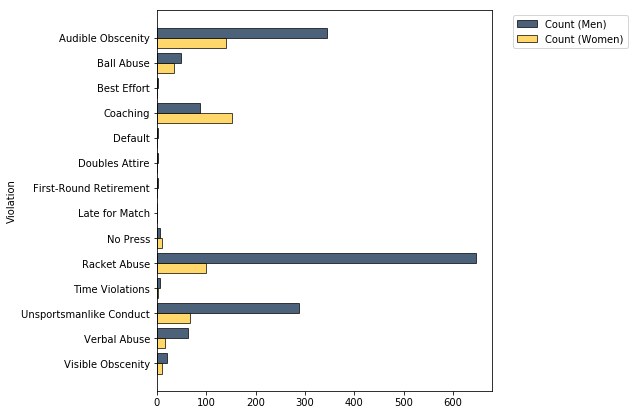

In [20]:
violations.barh('Violation')

In [22]:
men_sets = 229+118+60+28+17+5+3
men_sets

460

In [23]:
women_sets = 153+73+37+20+8+4+2
women_sets

297

In [25]:
normalized_women_violations = violations.column(2) / women_sets
normalized_women_violations

array([0.47138047, 0.11784512, 0.        , 0.51178451, 0.        ,
       0.003367  , 0.        , 0.003367  , 0.03367003, 0.33333333,
       0.01010101, 0.22558923, 0.05387205, 0.03703704])

In [26]:
normalized_men_violations = violations.column(1) / men_sets
normalized_men_violations

array([0.74782609, 0.10652174, 0.00434783, 0.18913043, 0.00434783,
       0.00434783, 0.00434783, 0.00217391, 0.01304348, 1.40434783,
       0.01521739, 0.62391304, 0.13478261, 0.04347826])

In [27]:
normalized_violations = violations.select(0).with_column('Violations count men (normalized)', normalized_men_violations).with_column('Violations count women (normalized)', normalized_women_violations)
normalized_violations

Violation,Violations count men (normalized),Violations count women (normalized)
Audible Obscenity,0.747826,0.47138
Ball Abuse,0.106522,0.117845
Best Effort,0.00434783,0
Coaching,0.18913,0.511785
Default,0.00434783,0
Doubles Attire,0.00434783,0.003367
First-Round Retirement,0.00434783,0
Late for Match,0.00217391,0.003367
No Press,0.0130435,0.03367
Racket Abuse,1.40435,0.333333


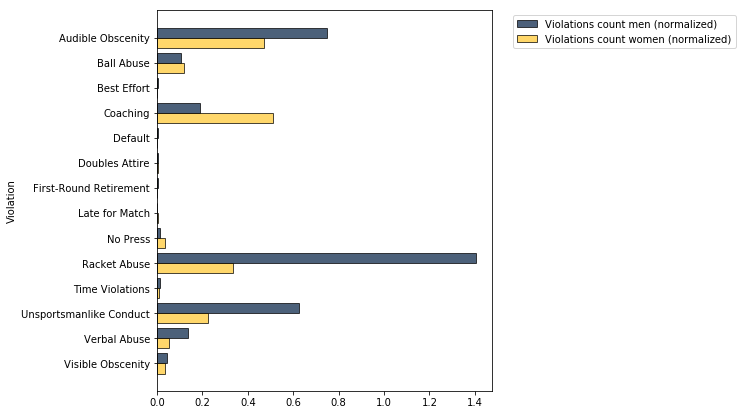

In [28]:
normalized_violations.barh('Violation')

In [29]:
heights = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_heights.csv')
ranking = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_ranks.csv')
serving = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/tennis_men_serving.csv')

In [30]:
heights

Name,Height
John Isner,82
Roger Federer,73
Milos Raonic,77
Nick Kyrgios,76
Kevin Anderson,80
Sam Querrey,78
Juan Martin del Potro,78
Marin Cilic,78
Rafael Nadal,73
Steve Johnson,74


In [31]:
ranking

Name,Rank
Rafael Nadal,1
Roger Federer,2
Novak Djokovic,3
Juan Martin del Potro,4
Alexander Zverev,5
Marin Cilic,6
Grigor Dimitrov,7
Dominic Thiem,8
Kevin Anderson,9
John Isner,10


In [32]:
serving

Name,Percentage,Games Won,Total Games,Matches
John Isner,94.27,674,715,44
Roger Federer,93.11,527,566,42
Milos Raonic,90.38,451,499,38
Nick Kyrgios,89.98,422,469,32
Kevin Anderson,88.98,686,771,50
Sam Querrey,87.5,420,480,34
Juan Martin del Potro,87.48,622,711,54
Marin Cilic,87.25,602,690,48
Rafael Nadal,86.44,529,612,47
Steve Johnson,86.33,480,556,45


In [34]:
heights_ranking = heights.join('Name', ranking)
heights_ranking

Name,Height,Rank
Alexander Zverev,78,5
Dominic Thiem,73,8
Grigor Dimitrov,75,7
John Isner,82,10
Juan Martin del Potro,78,4
Kevin Anderson,80,9
Marin Cilic,78,6
Novak Djokovic,74,3
Rafael Nadal,73,1
Roger Federer,73,2


In [35]:
heights_ranking_serves = heights_ranking.join('Name', serving.select(0,1))
heights_ranking_serves

Name,Height,Rank,Percentage
Alexander Zverev,78,5,82.83
Dominic Thiem,73,8,85.63
Grigor Dimitrov,75,7,81.55
John Isner,82,10,94.27
Juan Martin del Potro,78,4,87.48
Kevin Anderson,80,9,88.98
Marin Cilic,78,6,87.25
Novak Djokovic,74,3,86.01
Rafael Nadal,73,1,86.44
Roger Federer,73,2,93.11


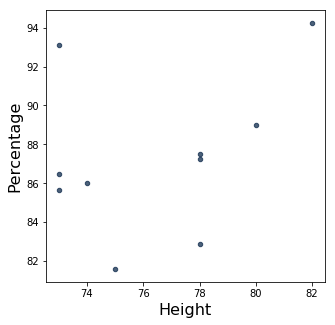

In [36]:
heights_ranking_serves.scatter('Height','Percentage')

In [37]:
trips = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [38]:
trips.sort('Duration')

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
900176,60,8/21/2015 13:24,Temporary Transbay Terminal (Howard at Beale),55,8/21/2015 13:25,Temporary Transbay Terminal (Howard at Beale),55,522,Subscriber,94109
874889,60,8/4/2015 9:57,San Francisco Caltrain 2 (330 Townsend),69,8/4/2015 9:58,San Francisco Caltrain 2 (330 Townsend),69,374,Subscriber,94107
869535,60,7/30/2015 17:45,Howard at 2nd,63,7/30/2015 17:46,Howard at 2nd,63,382,Customer,90034
863009,60,7/27/2015 8:30,San Francisco Caltrain (Townsend at 4th),70,7/27/2015 8:31,San Francisco Caltrain 2 (330 Townsend),69,336,Subscriber,94403
829206,60,6/30/2015 20:37,Post at Kearny,47,6/30/2015 20:38,2nd at South Park,64,410,Subscriber,94107
821841,60,6/25/2015 9:22,Spear at Folsom,49,6/25/2015 9:23,Spear at Folsom,49,591,Subscriber,94404
794867,60,6/4/2015 19:13,Steuart at Market,74,6/4/2015 19:14,Steuart at Market,74,461,Subscriber,94103
788322,60,6/1/2015 9:50,Howard at 2nd,63,6/1/2015 9:51,Howard at 2nd,63,238,Subscriber,94105
786160,60,5/29/2015 14:45,Harry Bridges Plaza (Ferry Building),50,5/29/2015 14:46,Harry Bridges Plaza (Ferry Building),50,441,Customer,94546
777343,60,5/21/2015 19:29,San Francisco Caltrain (Townsend at 4th),70,5/21/2015 19:30,San Francisco Caltrain (Townsend at 4th),70,546,Subscriber,94133


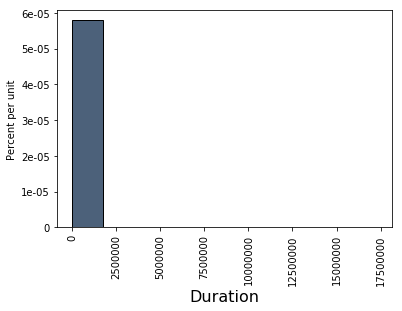

In [40]:
trips.hist('Duration')

In [42]:
commuting = trips.where('Duration', are.below(60*60))
commuting.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
493956,3599,10/11/2014 13:49,University and Emerson,35,10/11/2014 14:49,Palo Alto Caltrain Station,34,123,Customer,94109
755452,3599,5/6/2015 10:46,Powell Street BART,39,5/6/2015 11:46,Embarcadero at Sansome,60,470,Customer,nil
767948,3599,5/15/2015 1:04,Market at Sansome,77,5/15/2015 2:04,Mechanics Plaza (Market at Battery),75,560,Subscriber,94107
833626,3599,7/5/2015 13:23,Washington at Kearny,46,7/5/2015 14:23,Washington at Kearny,46,413,Customer,95148
779722,3597,5/24/2015 15:41,Embarcadero at Bryant,54,5/24/2015 16:41,Embarcadero at Folsom,51,601,Customer,91384
825483,3597,6/28/2015 12:46,Rengstorff Avenue / California Street,33,6/28/2015 13:46,Castro Street and El Camino Real,32,683,Customer,94040
511138,3596,10/23/2014 3:27,Post at Kearny,47,10/23/2014 4:27,Post at Kearny,47,552,Customer,94109
769851,3596,5/16/2015 17:15,Powell at Post (Union Square),71,5/16/2015 18:15,Powell at Post (Union Square),71,600,Customer,89101
568123,3595,12/6/2014 12:19,Clay at Battery,41,12/6/2014 13:19,2nd at South Park,64,406,Customer,90007
626553,3595,1/31/2015 15:30,Harry Bridges Plaza (Ferry Building),50,1/31/2015 16:30,Powell at Post (Union Square),71,492,Customer,nil


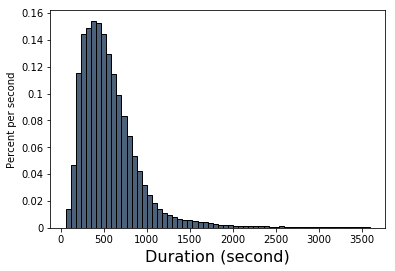

In [46]:
commuting.hist('Duration', bins = 60, unit = 'second')

In [48]:
per_start_station = commuting.group('Start Station')
per_start_station

Start Station,count
2nd at Folsom,7904
2nd at South Park,9374
2nd at Townsend,13848
5th at Howard,7526
Adobe on Almaden,535
Arena Green / SAP Center,616
Beale at Market,8224
Broadway St at Battery St,7533
California Ave Caltrain Station,347
Castro Street and El Camino Real,1174


In [49]:
per_start_station.sort('count', descending=True)

Start Station,count
San Francisco Caltrain (Townsend at 4th),26064
San Francisco Caltrain 2 (330 Townsend),21632
Harry Bridges Plaza (Ferry Building),16288
Temporary Transbay Terminal (Howard at Beale),14347
2nd at Townsend,13848
Townsend at 7th,13671
Steuart at Market,13392
Embarcadero at Sansome,13373
Market at 10th,11665
Market at Sansome,11174


In [50]:
commuting.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,191,555,108,0,0,40,22,0,0,46,78,54,0,9,77,33,41,14,0,0,11,31,419,53,0,0,169,115,303,33,0,0,0,0,0,0,61,123,88,0,0,0,0,0,0,0,0,0,696,445,22,0,0,0,0,0,0,0,0,38,57,0,0,40,237,344,0,17,32
2nd at South Park,297,179,74,183,0,0,209,85,0,0,114,89,162,0,37,59,178,85,116,0,0,58,73,577,503,0,0,140,201,1634,119,0,0,0,0,0,0,299,88,114,0,0,0,0,0,0,0,0,0,561,483,48,0,0,0,0,0,0,0,0,66,152,0,0,376,429,144,0,63,211
2nd at Townsend,438,156,218,92,0,0,609,356,0,0,80,332,172,0,387,368,662,530,263,0,0,27,320,2635,296,0,0,110,238,849,177,0,0,0,0,0,0,120,116,141,0,0,0,0,0,0,0,0,0,916,304,17,0,0,0,0,0,0,0,0,75,513,0,0,2355,784,423,0,60,167
5th at Howard,114,182,152,117,0,0,59,133,0,0,209,77,129,0,30,57,49,174,55,0,0,87,78,375,479,0,0,303,163,168,93,0,0,0,0,0,0,93,188,172,0,0,0,0,0,0,0,0,0,690,1864,49,0,0,0,0,0,0,0,0,116,102,0,0,182,750,202,0,45,268
Adobe on Almaden,0,0,0,0,18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,8,7,16,0,0,0,0,0,19,23,265,0,20,4,5,12,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,26,3,8,0,0,0,0,0,6,21,9,0,56,12,43,265,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,61,0,0,71,661,0,0,201,75,101,0,247,178,39,592,167,0,0,54,438,62,72,0,0,286,236,166,29,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,642,270,25,0,0,0,0,0,0,0,0,245,133,0,0,17,168,35,0,64,45
Broadway St at Battery St,68,92,280,119,0,0,1023,124,0,0,63,284,227,0,193,200,80,234,36,0,0,7,72,174,49,0,0,32,108,344,219,0,0,0,0,0,0,171,71,220,0,0,0,0,0,0,0,0,0,696,440,9,0,0,0,0,0,0,0,0,19,106,0,0,352,751,51,0,89,50
California Ave Caltrain Station,0,0,0,0,0,0,0,0,48,1,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,199,42,0,0,0,0,1,0,0,7,0,0,0,18,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,65,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,934,36,0,2,0,0,0,0,0,0,0,8,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
minimal_times = commuting.select('Duration','Start Station', 'End Station').group(['Start Station', 'End Station'], min)
minimal_times

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [55]:
minimal_times.where('Duration min', are.above(60)).sort('Duration min')

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
Embarcadero at Bryant,Embarcadero at Bryant,61
Embarcadero at Folsom,Spear at Folsom,61
Embarcadero at Vallejo,Embarcadero at Vallejo,61
Market at 10th,Market at 10th,61
Market at 4th,Market at 4th,61
Market at Sansome,2nd at South Park,61
Mechanics Plaza (Market at Battery),Mechanics Plaza (Market at Battery),61
Post at Kearny,Washington at Kearny,61


In [56]:
stations = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week4/station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [57]:
Marker.map_table(stations.select('lat', 'long', 'name'))

/opt/tljh/user/lib/python3.6/site-packages/datascience/maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


In [59]:
Circle.map_table(stations.select('lat', 'long', 'name'))

/opt/tljh/user/lib/python3.6/site-packages/datascience/maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)


In [60]:
count_per_start_station = commuting.group('Start Station')

In [61]:
count_per_start_station

Start Station,count
2nd at Folsom,7904
2nd at South Park,9374
2nd at Townsend,13848
5th at Howard,7526
Adobe on Almaden,535
Arena Green / SAP Center,616
Beale at Market,8224
Broadway St at Battery St,7533
California Ave Caltrain Station,347
Castro Street and El Camino Real,1174


In [62]:
location_count = stations.join('name', count_per_start_station, 'Start Station')
location_count

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7904
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9374
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13848
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7526
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,535
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,616
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8224
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7533
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,347
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1174


In [68]:
sizes = location_count.column('count') * 1000

In [69]:
location_count.select('lat', 'long', 'name').with_column('color', 'blue').with_column('size', sizes)

lat,long,name,color,size
37.7853,-122.396,2nd at Folsom,blue,7904000
37.7823,-122.393,2nd at South Park,blue,9374000
37.7805,-122.39,2nd at Townsend,blue,13848000
37.7818,-122.405,5th at Howard,blue,7526000
37.3314,-121.893,Adobe on Almaden,blue,535000
37.3327,-121.9,Arena Green / SAP Center,blue,616000
37.7923,-122.397,Beale at Market,blue,8224000
37.7985,-122.401,Broadway St at Battery St,blue,7533000
37.4291,-122.143,California Ave Caltrain Station,blue,347000
37.386,-122.084,Castro Street and El Camino Real,blue,1174000


In [70]:
Circle.map_table(location_count.select('lat', 'long', 'name').with_column('color', 'blue').with_column('size', sizes))

In [73]:
landmarks = location_count.group('landmark')
landmarks

landmark,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,33
San Jose,16


In [75]:
colors = landmarks.with_column('color', make_array('red','blue','green','orange', 'magenta'))

In [77]:
locations_with_sizes = location_count.select('lat', 'long', 'name', 'landmark').with_column('size', sizes)
locations_with_sizes

lat,long,name,landmark,size
37.7853,-122.396,2nd at Folsom,San Francisco,7904000
37.7823,-122.393,2nd at South Park,San Francisco,9374000
37.7805,-122.39,2nd at Townsend,San Francisco,13848000
37.7818,-122.405,5th at Howard,San Francisco,7526000
37.3314,-121.893,Adobe on Almaden,San Jose,535000
37.3327,-121.9,Arena Green / SAP Center,San Jose,616000
37.7923,-122.397,Beale at Market,San Francisco,8224000
37.7985,-122.401,Broadway St at Battery St,San Francisco,7533000
37.4291,-122.143,California Ave Caltrain Station,Palo Alto,347000
37.386,-122.084,Castro Street and El Camino Real,Mountain View,1174000


In [81]:
all_table = locations_with_sizes.join('landmark', colors)

In [82]:
Circle.map_table(all_table.select('lat', 'long','name','color','size'))

/opt/tljh/user/lib/python3.6/site-packages/datascience/maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)
